## Create Word2Vec Model

---

In [1]:
# from createWord2VecModel import createW2VModel

# createW2VModel(models = ["skipgram", "cbow"])

Succesfully


---

## Visualize Words

---

### Skip-gram

---

In [2]:
from word2vec.Word2Vec import studentFeedbackWord2Vec

w2v_skipgram = studentFeedbackWord2Vec()
w2v_skipgram.load("word2vec/skipgram_model.bin")
w2v_skipgram.most_similar("giảng viên")

[('giáo viên', 0.7961173057556152),
 ('thầy giáo', 0.6603303551673889),
 ('thầy', 0.6395307183265686),
 ('lịch sự', 0.6110140085220337),
 ('cô', 0.6044704914093018),
 ('hết lòng', 0.6004809141159058),
 ('cẩn thận', 0.5924038887023926),
 ('đều đặn', 0.5840983986854553),
 ('kỹ lưỡng', 0.5753787159919739),
 ('hăng say', 0.5736873149871826)]

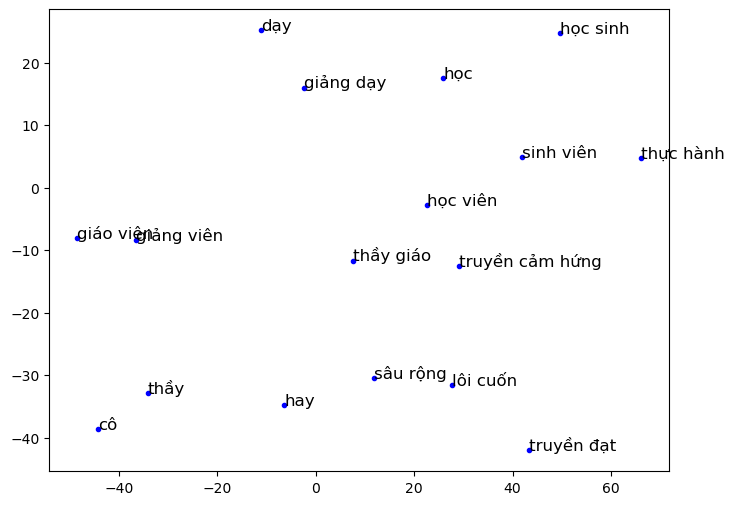

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Chọn các từ bạn muốn vẽ
selected_words = ["thầy", "thầy giáo","giảng viên", "giáo viên", "cô",
                  "học", "thực hành", "giảng dạy", "dạy", "truyền đạt", 
                  "sinh viên", "học sinh", "học viên", 
                  "lôi cuốn", "truyền cảm hứng", "hay", "sâu rộng"]

# Lấy vector của các từ từ mô hình
vectors = np.array([w2v_skipgram.get_vector(word) for word in selected_words])

# Giảm chiều dữ liệu về 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, perplexity=5 ,random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.', color='b')

# Hiển thị tên của các từ
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)

plt.show()

In [4]:
print(w2v_skipgram.get_vectors().shape)
w2v_skipgram.get_vectors()

(1417, 200)


array([[ 0.04706901,  0.04697308,  0.12053639, ..., -0.10975017,
        -0.14133483,  0.09999546],
       [-0.02706477, -0.21032779, -0.12009019, ..., -0.1416798 ,
         0.0310597 , -0.22083569],
       [-0.02754532,  0.05829177, -0.07787398, ..., -0.32446513,
        -0.06499125, -0.03382463],
       ...,
       [ 0.04703511,  0.00425424, -0.05081932, ..., -0.13321182,
         0.10176032, -0.098496  ],
       [ 0.0546285 , -0.14185156,  0.10670795, ..., -0.22149621,
        -0.06195882, -0.04163087],
       [ 0.06285618,  0.04265485, -0.00717064, ..., -0.04289993,
         0.0214246 , -0.12970564]], dtype=float32)

### Save Skipgram Vectors

In [4]:
import pickle as pkl
words = dict()
    
for word in w2v_skipgram.get_vocab():
    words[word] = w2v_skipgram.get_vector(word)
    
with open("utils/words_dict.pkl", 'wb') as file:
    pkl.dump(words, file)

In [5]:
# Load Vectorizer
with open("utils/words_dict.pkl", "rb") as file:
    words = pkl.load(file)

---

## Processing

---

In [6]:
from underthesea import word_tokenize
from utils.preprocessing import remove_punctuation

def tokenize_vietnamese_sentence(sentence):
    return word_tokenize(remove_punctuation(sentence.lower()))

def sent2vec(message, word_dict = words):
    tokens = tokenize_vietnamese_sentence(message)
    vectors = []
    
    for token in tokens:
        if token not in word_dict.keys():
            continue
        token_vector = word_dict[token]
        vectors.append(token_vector)
    return np.array(vectors, dtype=float)

In [7]:
sent2vec("thầy dạy tốt.").shape

(3, 200)

In [8]:
import pandas as pd
train_df = pd.read_csv("Data/train.csv")
dev_df   = pd.read_csv("Data/dev.csv")
test_df  = pd.read_csv("Data/test.csv")

X_train, y_train = train_df["sents"], train_df["sentiments"]
X_dev, y_dev = dev_df["sents"], dev_df["sentiments"]
X_test, y_test = test_df["sents"], test_df["sentiments"]

In [9]:
len(train_df), len(dev_df), len(test_df)

(11426, 1583, 3166)

In [10]:
def df_to_X_y(dataframe):
    y = dataframe["sentiments"].to_numpy().astype(int)
    
    all_word_vector_sequences = []
    
    for message in dataframe["sents"]:
      message_as_vector_seq = sent2vec(message)
      if message_as_vector_seq.shape[0] == 0:
        message_as_vector_seq = np.zeros(shape=(1, 200))

      all_word_vector_sequences.append(message_as_vector_seq)
    
    return all_word_vector_sequences, y

In [11]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train), len(X_train[0]))

11426 3


In [12]:
print(len(X_train), len(X_train[2]))

11426 5


(array([8.174e+03, 2.439e+03, 5.870e+02, 1.460e+02, 5.000e+01, 2.100e+01,
        5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <BarContainer object of 10 artists>)

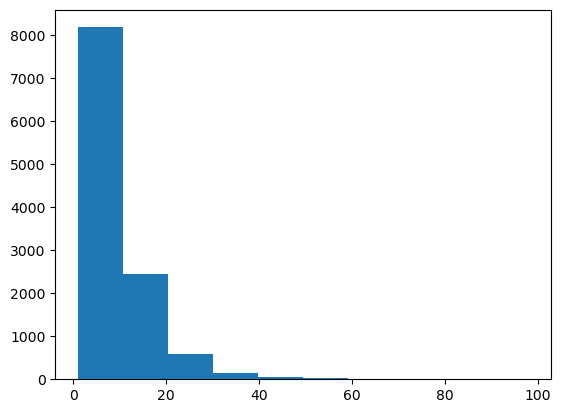

In [13]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [14]:
pd.Series(sequence_lengths).describe()

count    11426.000000
mean         9.224313
std          7.202322
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max         98.000000
dtype: float64

In [15]:
from copy import deepcopy

# Create sequences padding for X
def pad_sequences(X, desired_sequence_length=205):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len
    
    pad = np.zeros(shape=(sequence_length_difference, 200))

    X_copy[i] = np.concatenate([x, pad])
  
  return np.array(X_copy).astype(float)

In [16]:
X_train = pad_sequences(X_train)

X_train.shape

(11426, 205, 200)

In [17]:
y_train.shape

(11426,)

In [18]:
X_val, y_val = df_to_X_y(dev_df)
X_val = pad_sequences(X_val)

X_val.shape, y_val.shape

((1583, 205, 200), (1583,))

In [19]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_sequences(X_test)

X_test.shape, y_test.shape

((3166, 205, 200), (3166,))

---

## Generate LSTM Model

---

In [20]:
from keras import layers
from keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(205, 200)))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 205, 128)          168448    
                                                                 
 dropout (Dropout)           (None, 205, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 205, 64)           49408     
                                                                 
 dropout_1 (Dropout)         (None, 205, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 205, 32)           12416     
                                                                 
 dropout_2 (Dropout)         (None, 205, 32)           0         
                                                                 
 flatten (Flatten)           (None, 6560)              0

In [22]:
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.metrics import AUC
from keras.callbacks import ModelCheckpoint

# Import the legacy optimizer
from keras.optimizers import legacy

cp = ModelCheckpoint('model/', save_best_only=True)

# Use the legacy Adam optimizer
optimizer = legacy.Adam(learning_rate=0.01)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
frequencies = pd.value_counts(train_df['sentiments'])

frequencies

sentiments
2    5643
0    5325
1     458
Name: count, dtype: int64

In [24]:
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1], 2: frequencies.sum() / frequencies[2]}
weights

{0: 2.1457276995305166, 1: 24.94759825327511, 2: 2.024809498493709}

In [25]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp], class_weight=weights)

Epoch 1/20
358/358 [==============================] - ETA: 0s - loss: 1.9360 - accuracy: 0.7511INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


358/358 [==============================] - 94s 255ms/step - loss: 1.9360 - accuracy: 0.7511 - val_loss: 0.4746 - val_accuracy: 0.7934
Epoch 2/20
358/358 [==============================] - 83s 233ms/step - loss: 1.5587 - accuracy: 0.8040 - val_loss: 0.5833 - val_accuracy: 0.7631
Epoch 3/20
358/358 [==============================] - ETA: 0s - loss: 1.4189 - accuracy: 0.8178INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


358/358 [==============================] - 92s 256ms/step - loss: 1.4189 - accuracy: 0.8178 - val_loss: 0.4661 - val_accuracy: 0.8023
Epoch 4/20
358/358 [==============================] - 84s 234ms/step - loss: 1.3637 - accuracy: 0.8317 - val_loss: 0.4882 - val_accuracy: 0.8010
Epoch 5/20
358/358 [==============================] - ETA: 0s - loss: 1.2294 - accuracy: 0.8464INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


358/358 [==============================] - 92s 258ms/step - loss: 1.2294 - accuracy: 0.8464 - val_loss: 0.3955 - val_accuracy: 0.8446
Epoch 6/20
358/358 [==============================] - ETA: 0s - loss: 1.1510 - accuracy: 0.8526INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


358/358 [==============================] - 93s 259ms/step - loss: 1.1510 - accuracy: 0.8526 - val_loss: 0.3518 - val_accuracy: 0.8591
Epoch 7/20
358/358 [==============================] - ETA: 0s - loss: 1.1062 - accuracy: 0.8552INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


358/358 [==============================] - 91s 255ms/step - loss: 1.1062 - accuracy: 0.8552 - val_loss: 0.2779 - val_accuracy: 0.8939
Epoch 8/20
358/358 [==============================] - 85s 236ms/step - loss: 0.9943 - accuracy: 0.8678 - val_loss: 0.3131 - val_accuracy: 0.8812
Epoch 9/20
358/358 [==============================] - 84s 235ms/step - loss: 0.9389 - accuracy: 0.8763 - val_loss: 0.3312 - val_accuracy: 0.8692
Epoch 10/20
358/358 [==============================] - 84s 236ms/step - loss: 0.9137 - accuracy: 0.8775 - val_loss: 0.3142 - val_accuracy: 0.8705
Epoch 11/20
358/358 [==============================] - 85s 237ms/step - loss: 0.8294 - accuracy: 0.8901 - val_loss: 0.3081 - val_accuracy: 0.8850
Epoch 12/20
358/358 [==============================] - 87s 243ms/step - loss: 0.7487 - accuracy: 0.8975 - val_loss: 0.3919 - val_accuracy: 0.8421
Epoch 13/20
358/358 [==============================] - 98s 274ms/step - loss: 0.7017 - accuracy: 0.9050 - val_loss: 0.3109 - val_accuracy:

INFO:tensorflow:Assets written to: model/assets


358/358 [==============================] - 101s 283ms/step - loss: 0.7207 - accuracy: 0.9039 - val_loss: 0.2776 - val_accuracy: 0.9015
Epoch 15/20
358/358 [==============================] - 89s 248ms/step - loss: 0.6066 - accuracy: 0.9163 - val_loss: 0.3135 - val_accuracy: 0.8977
Epoch 16/20
358/358 [==============================] - 94s 262ms/step - loss: 0.5767 - accuracy: 0.9212 - val_loss: 0.2941 - val_accuracy: 0.9090
Epoch 17/20
358/358 [==============================] - 95s 265ms/step - loss: 0.5621 - accuracy: 0.9248 - val_loss: 0.3400 - val_accuracy: 0.8920
Epoch 18/20
358/358 [==============================] - 96s 269ms/step - loss: 0.5703 - accuracy: 0.9219 - val_loss: 0.3423 - val_accuracy: 0.8812
Epoch 19/20
358/358 [==============================] - 96s 267ms/step - loss: 0.4821 - accuracy: 0.9329 - val_loss: 0.3166 - val_accuracy: 0.9084
Epoch 20/20
358/358 [==============================] - 95s 266ms/step - loss: 0.4900 - accuracy: 0.9338 - val_loss: 0.3398 - val_accura

In [27]:
from keras.models import load_model

# Assuming you have trained and saved your model as follows
model.save("models/lstm_model.h5")